In [1]:
%load_ext autoreload
%autoreload 2

# INSTALL

In [8]:
!pip install -U ydata-profiling
!pip install yellowbrick
!pip install aiomultiprocess
!pip install -U sentence-transformers

  Using cached ydata_profiling-4.2.0-py2.py3-none-any.whl (352 kB)
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.1.2
    Uninstalling ydata-profiling-4.1.2:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/conda/lib/python3.7/site-packages/pandas_profiling/__init__.py'
Consider using the `--user` option or check the permissions.



# IMPORTS

In [9]:
import sys
sys.path.append("../")

In [10]:
import pandas as pd
import json
from ydata_profiling import ProfileReport
from src.load_data import load_all


# CONSTANTS

In [11]:
pd.set_option("display.max_rows", 3500)
pd.set_option("display.max_columns", 200)

In [12]:
YEARS = range(2006, 2023)

# FUNCTIONS

In [13]:
import logging
logger = logging.getLogger("__name__")

In [16]:
data_dict=load_all(years = [2006, 2007, 2008])

INFO:__name__:Successfully loaded data: 2006
INFO:__name__:Successfully loaded data: 2007
INFO:__name__:Successfully loaded data: 2008


In [15]:
data_dict[2006]

,st_fips,state_name,place_name,place_govt,place_Pres_dem2pv,place_Pres_dem2pv_last,place_Gov_dem2pv,place_Gov_dem2pv_last,place_House_dem2pv,place_House_dem2pv_last,place_Sen_dem2pv,place_Sen_dem2pv_last,census_2010_pop,census_2010_pop_est,census_2015_pop_est,acs_2018_white,acs_2018_black,acs_2018_hispanic,acs_2018_pop,channel_id,channel_title,vid_id,vid_title,vid_desc,vid_length_min,vid_upload_date,vid_livestreamed,vid_views,vid_likes,vid_dislikes,vid_comments,vid_favorites,meeting_date,caption_text,caption_text_clean,channelType
0,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,JSTYbP5HvZQ,"League City Council Meeting for November 14, 2006",This file was provided for public viewing by J...,155.916667,2011-04-25,0,8,0,0,0,0,2006-11-14,{00:00:21} tell me when okay fellas were up go...,{00:00:21} tell me when okay fellas were up go...,INDEPENDENT
1,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,UbL-PG4H2kQ,"League City Council Meeting for October 24, 2006",This file was provided for public viewing by J...,149.816667,2011-04-25,0,12,0,0,0,0,2006-10-24,{00:00:24} alright alright let's welcome every...,{00:00:24} alright alright let's welcome every...,INDEPENDENT
2,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,8foq04n_dYU,"League City Council Meeting for December 12, 2006",This file was provided for public viewing by J...,124.016667,2011-04-25,0,8,0,0,0,0,2006-12-12,{00:00:41} Your Honor okay good afternoon will...,{00:00:41} Your Honor okay good afternoon will...,INDEPENDENT
3,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,KUXXWr_l8D8,"League City Council Meeting for November 28, 2006",This file was provided for public viewing by J...,109.733333,2011-04-25,0,0,0,0,0,0,2006-11-28,{00:00:28} okay good afternoon we will call th...,{00:00:28} okay good afternoon we will call th...,INDEPENDENT
4,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,qGtr7TxXdIE,"League City Council Meeting for October 10, 2006",This file was provided for public viewing by J...,61.650000,2011-04-25,0,2,0,0,0,0,2006-10-10,{00:00:32} okay we're up good afternoon we cal...,{00:00:32} okay we're up good afternoon we cal...,INDEPENDENT
5,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,0bHgnNOsa-k,"League City Council Meeting for September 12, ...",This file was provided for public viewing by J...,229.933333,2011-04-25,0,3,0,0,0,0,2006-09-12,NaN,NaN,INDEPENDENT
6,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,4Jq6wPKpjqE,"League City Council Meeting for August 8, 2006",This file was provided for public viewing by J...,111.550000,2011-04-25,0,0,0,0,0,0,2006-08-08,{00:00:12} thank you okay super hot good even...,{00:00:12} thank you okay super hot good even...,INDEPENDENT
7,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,yoxbFoeGQTA,"League City Council Meeting for September 26, ...",This file was provided for public viewing by J...,59.466667,2011-04-25,0,0,0,0,0,0,2006-09-26,{00:00:17} six we have a pub someone say hold ...,{00:00:17} six we have a pub someone say hold ...,INDEPENDENT
8,4841980,Texas,League City city,MUNICIPAL COUNCIL,

In [ ]:
year = 2022
base_path = f"gs://pblc_data/localnet/meetings.{year}.csv"
data = pd.read_csv(base_path)

KeyboardInterrupt: 

In [ ]:
data.head(3)

In [ ]:
def load_data(filepath: str) -> pd.DataFrame: 
    """
    """
    data = pd.read_csv(filepath)
    return data

# LOAD DATA

In [ ]:
filepaths = ["../data/meetings.2006.csv", "../data/meetings.2007.csv", "../data/meetings.2008.csv"] 
datas = []
for file in filepaths: 
    data = load_data(file)
    datas.append(data)

df = pd.concat(datas)

# EXPLORE

In [ ]:
df = y2006
print(df.loc[0, 'caption_text_clean'])

{00:00:21} tell me when okay fellas were up good  evening we will convene the City Council  of the City of League City regular  meeting November 14 2006 at 6pm call  roll Jerry Schultz here Ted Nelson Mike  Barbour prison Tommy combs here Chris  amazon fair Phyllis and born Sean kini  Jim Nelson item number two is the  invocation pledge of allegiance to the  US flag and the pledge of allegiance to  the Texas flag the invocation tonight  will be given by pastor Jerry Hatfield  of turning point church so if you'd come  forward if everybody would stand please  and this would be a good time to turn  off all phones and pagers let us pray  together father God we come to you in  the name of Jesus thank you for this  this group this council the mayor or God  you've given them great responsibility  we've elected them into this position  and there to lead our our city our  community thank you Lord for them I ask  you to bless them with wisdom and  guidance tonight Lord you you are the  foundatio

In [ ]:
df.columns

Index(['st_fips', 'state_name', 'place_name', 'place_govt',
       'place_Pres_dem2pv', 'place_Pres_dem2pv_last', 'place_Gov_dem2pv',
       'place_Gov_dem2pv_last', 'place_House_dem2pv',
       'place_House_dem2pv_last', 'place_Sen_dem2pv', 'place_Sen_dem2pv_last',
       'census_2010_pop', 'census_2010_pop_est', 'census_2015_pop_est',
       'acs_2018_white', 'acs_2018_black', 'acs_2018_hispanic', 'acs_2018_pop',
       'channel_id', 'channel_title', 'vid_id', 'vid_title', 'vid_desc',
       'vid_length_min', 'vid_upload_date', 'vid_livestreamed', 'vid_views',
       'vid_likes', 'vid_dislikes', 'vid_comments', 'vid_favorites',
       'meeting_date', 'caption_text', 'caption_text_clean', 'channelType'],
      dtype='object')

In [ ]:
df['state_name'].unique()

array(['Texas', 'California'], dtype=object)

In [ ]:
df.loc[0, 'vid_id']

'JSTYbP5HvZQ'

In [ ]:
mtg_txt = list(df.loc[0, 'caption_text'])
mtg_txt

"{00:00:21} tell me when okay fellas were up good  evening we will convene the City Council  of the City of League City regular  meeting November 14 2006 at 6pm call  roll Jerry Schultz here Ted Nelson Mike  Barbour prison Tommy combs here Chris  amazon fair Phyllis and born Sean kini  Jim Nelson item number two is the  invocation pledge of allegiance to the  US flag and the pledge of allegiance to  the Texas flag the invocation tonight  will be given by pastor Jerry Hatfield  of turning point church so if you'd come  forward if everybody would stand please  and this would be a good time to turn  off all phones and pagers let us pray  together father God we come to you in  the name of Jesus thank you for this  this group this council the mayor or God  you've given them great responsibility  we've elected them into this position  and there to lead our our city our  community thank you Lord for them I ask  you to bless them with wisdom and  guidance tonight Lord you you are the  foundati

In [ ]:
json.dumps(df.loc[0, 'caption_text_clean'].values)

TypeError: Object of type ndarray is not JSON serializable

## Data Profile Report

In [ ]:
# Save the report to an HTML file
from IPython.display import HTML
profile = ProfileReport(df)
profile.to_file("profile_report.html")
HTML('./output/profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ydata_profiling/model/correlations.py:72: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Caption Distribution

<AxesSubplot:title={'center':'Tokens per Caption'}, xlabel='Tokens', ylabel='Number of Meetings'>

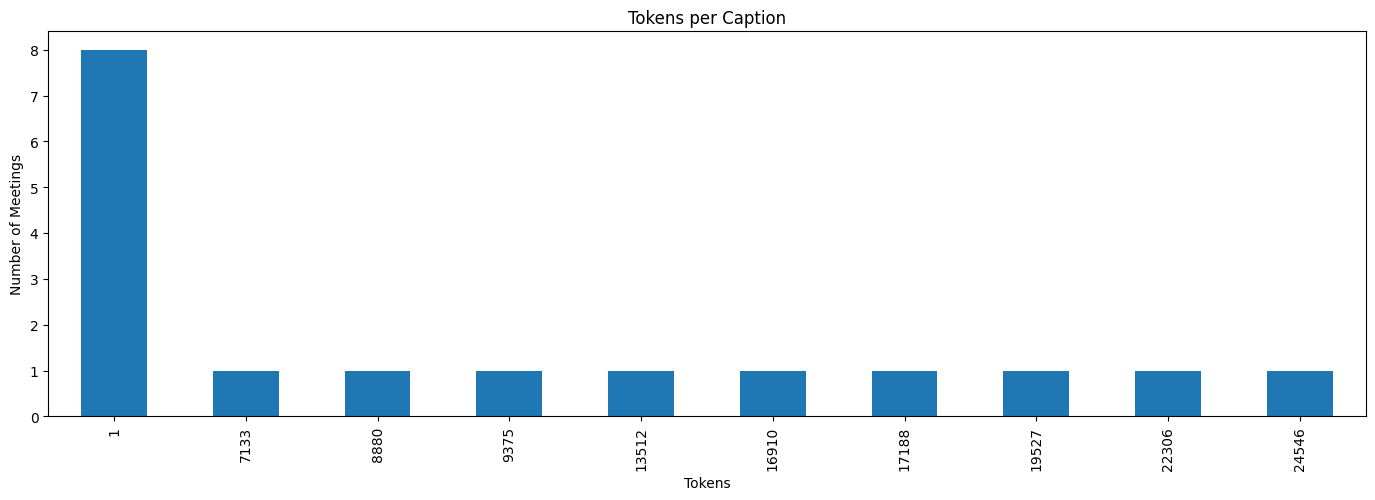

In [ ]:
#Analyze the token count with a bar chart
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 200
%matplotlib inline
import matplotlib.pyplot as plt

df['caption_text_clean'] = df['caption_text_clean'].astype(str)
df['caption_token_count'] = df['caption_text_clean'].apply(lambda x: len(x.split()))

df['caption_token_count'].value_counts().sort_index().plot.bar(figsize=(17,5), 
                                                                    title='Tokens per Caption',
                                                                    xlabel='Tokens',
                                                                    ylabel='Number of Meetings')

## Data Profile by Location

## Token Count

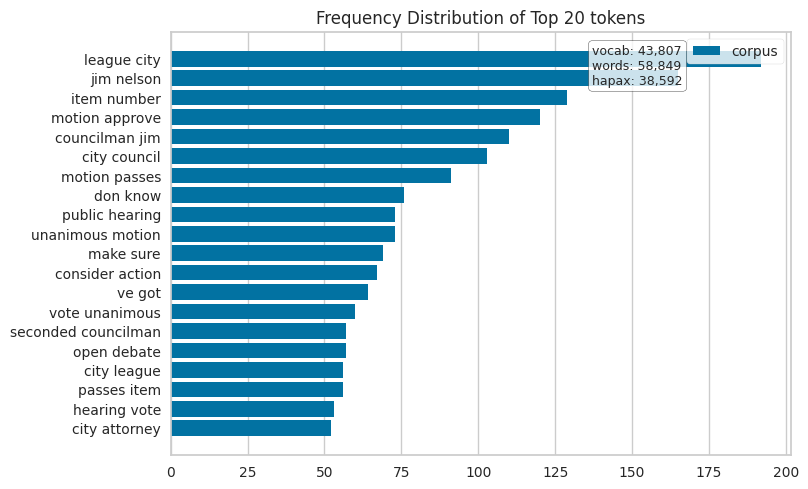

<AxesSubplot:title={'center':'Frequency Distribution of Top 20 tokens'}>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

corpus = df['caption_text_clean']

vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, n=20, orient='h')
visualizer.fit(docs)
visualizer.show()

## Similarity Matrix

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 51.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 9.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 62.2 MB/s eta 0:00:0000:0100:01
     ━━━━

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

corpus_list = df['caption_text_clean'].to_list()
similarity_row = []
similarity_matrix = []
for caption_1 in corpus_list:
  for caption_2 in corpus_list:
    embedding_1 = model.encode(caption_1).reshape(1, -1)
    embedding_2 = model.encode(caption_2).reshape(1, -1)
    cosine_similarity_metric = cosine_similarity(embedding_1, embedding_2)
    similarity_row.append(cosine_similarity_metric)
    print('%3f ' % cosine_similarity_metric, end="")
  print()
  similarity_matrix.append(similarity_row)
  similarity_row = []

OSError: /opt/conda/lib/python3.7/site-packages/nvidia/cublas/lib/libcublas.so.11: symbol cublasLtGetStatusString version libcublasLt.so.11 not defined in file libcublasLt.so.11 with link time reference

### Most Similar Captions

In [ ]:
# Reshape our matrix so we can fill the diagonal
similarity_matrix = np.array(similarity_matrix).reshape(len(corpus_list), len(corpus_list))

# Fill the values along the diagonal with 0, so we don't count them as most similar
np.fill_diagonal(similarity_matrix, 0)
indices = np.argwhere(similarity_matrix == similarity_matrix.max())

# Print the max similarity for our data set
print(f"Maximum cosine similarity: {similarity_matrix[indices[0][0], indices[1][0]]}")

# Print the review text
print(corpus_list[indices[0][0]])
print(corpus_list[indices[1][0]])

# OUTPUT